In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('feature_engineered.csv')

# Floor Area

In [4]:
df['Floor_area'].describe()

count      3224.000000
mean       1416.959677
std        2124.519985
min          84.000000
25%        1050.000000
50%        1301.500000
75%        1554.000000
max      108000.000000
Name: Floor_area, dtype: float64

In [5]:
df = df[df['Floor_area'] != 108000.000000]

In [6]:
df = df[~df['Title'].str.contains('land',case=False,na=False)]

In [7]:
df = df[df['Floor_area'] != 14528.0]

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(2443, 14)

In [10]:
px.box(df, x='Floor_area')

np.float64(4.905823672560043)

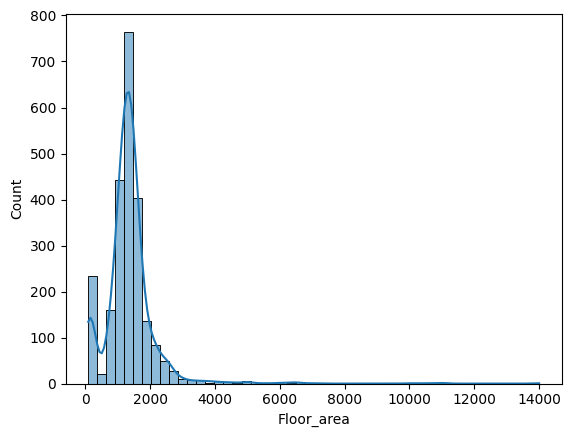

In [11]:
sns.histplot(df['Floor_area'],kde=True,bins=50)
df['Floor_area'].skew()

np.float64(-1.7672037369753892)

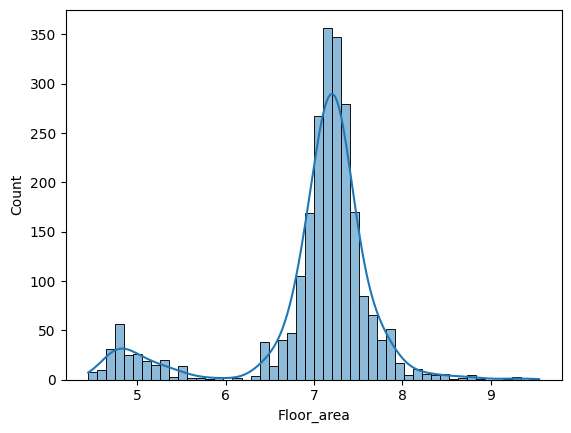

In [12]:
sns.histplot(np.log1p(df['Floor_area']),kde=True,bins=50)
np.log1p(df['Floor_area']).skew()

In [13]:
q1 = df['Floor_area'].quantile(0.25)
q3 = df['Floor_area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound)
print(upper_bound)



300.0
2300.0


In [14]:
df[(df['Floor_area'] < lower_bound) | (df['Floor_area'] > upper_bound)].shape

(364, 14)

In [15]:
df[df['Floor_area'] > 3000][['location_area','Price_in_Cr']]

,location_area,Price_in_Cr
21,gulshan,7.80
22,kathalbagan,11.00
127,uttara,3.90
140,bashundhara,5.40
156,uttara,4.50
351,uttara,5.70
425,uttara,4.40
436,bashundhara,3.41
468,dhanmondi,2.90
526,motijheel,5.78


# Price in Cr

In [16]:
df['Price_in_Cr'].describe()

count    2443.000000
mean        1.026521
std         1.554044
min         0.000000
25%         0.500000
50%         0.700000
75%         1.070000
max        35.000000
Name: Price_in_Cr, dtype: float64

In [17]:
px.box(df, x='Price_in_Cr')

In [18]:
df = df[df['Price_in_Cr'] != 0]

In [19]:
df = df[df['Price_in_Cr'] != 0.010000]

In [20]:
df = df[~(df['Price_in_Cr'] < 0.1)]

In [21]:
df[df['Price_in_Cr'] > 15]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Location,location_area,Price_in_Cr,is_commercial,is_residential,Price_per_sqft,floor_level
622,6200 Sq Ft Commercial Space With Quality Fittings Is For Sale In Ibrahimpur,NaN,NaN,3.0,vacant,6200.0,dhaka,"North Ibrahimpur, Ibrahimpur",ibrahimpur,15.50,1.0,0.0,25000.00,low
1410,11003 Square Feet Commercial Space Is Ready For Sale In Bashundhara,NaN,NaN,5.0,vacant,11003.0,dhaka,"Block I, Bashundhara R-A",bashundhara,15.40,1.0,0.0,13996.18,medium
1423,Commercial Area Of 11003 Sq Ft Is Up For Sale At Bashundhara,NaN,NaN,11.0,vacant,11003.0,dhaka,"Block I, Bashundhara R-A",bashundhara,15.40,1.0,0.0,13996.18,high
1487,See This 4686 Sq Ft Vacant Commercial Space Up For Sale In Motijheel Road Near Eastern Bank Limited,NaN,NaN,1.0,vacant,4686.0,dhaka,"Motijheel Road, Motijheel",motijheel,21.09,1.0,0.0,45006.40,low
1739,"14000 Sq Ft A Fully Fitted Elegant Office Is Available For Sale At 28 No. Pathantooly Ward, Double Mooring",NaN,NaN,6.0,vacant,14000.0,chattogram,"28 No. Pathantooly Ward, Double Mooring",double mooring,35.00,1.0,0.0,25000.00,medium
2767,"This 10000 Sq Ft Commercial Space Is Up For Sale At Cda Avenue, East Nasirabad",NaN,NaN,10.0,vacant,10000.0,chattogram,"CDA Avenue, East Nasirabad",east nasirabad,30.00,1.0,0.0,30000.00,high
3240,6500 Square Feet Commercial Space Is Available For Sale In Gazipur Sadar Upazila,NaN,NaN,3.0,vacant,6500.0,gazipur,"Shimultoly, Gazipur Sadar Upazila",gazipur sadar upazila,18.20,1.0,0.0,28000.00,low


In [22]:
df = df[df['is_commercial'] == 0]

In [23]:
df.shape

(2113, 14)

In [24]:
df = df[df['Price_in_Cr'] != 0.13]

In [25]:
df = df[~(df['Price_in_Cr'] > 8)]

# Price_per_sqft

np.float64(2.6395557006007606)

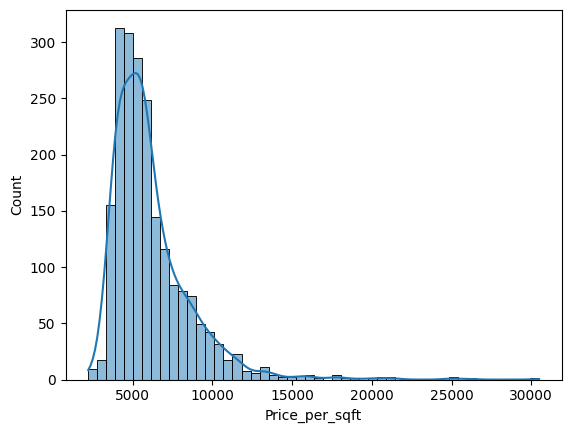

In [26]:
sns.histplot(df['Price_per_sqft'],kde=True,bins=50)
df['Price_per_sqft'].skew()

np.float64(0.7694354984647982)

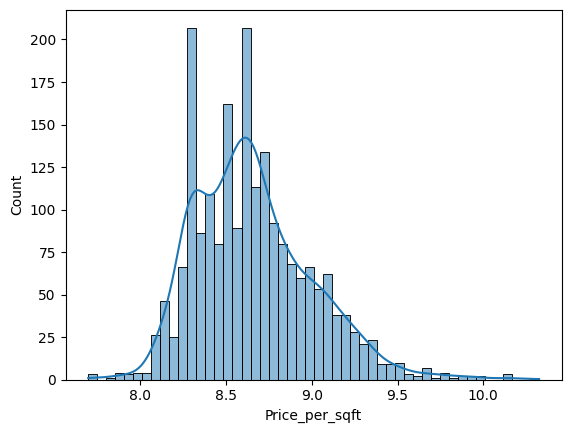

In [27]:
sns.histplot(np.log1p(df['Price_per_sqft']),kde=True,bins=50)
np.log1p(df['Price_per_sqft']).skew()

In [28]:
df['Price_per_sqft'].describe()

count     2054.000000
mean      6130.668939
std       2530.324105
min       2200.000000
25%       4480.690000
50%       5515.150000
75%       6972.817500
max      30496.450000
Name: Price_per_sqft, dtype: float64

In [29]:
px.box(df, x='Price_per_sqft')

In [30]:
df = df[df['Price_per_sqft'] != 30496.45]

In [104]:
# df.loc[3177,'Floor_area'] = 4800
# df.loc[1949,'Bedrooms'] = 3
df.loc[1949,'location_area'] = 'West Sholoshohor Ward'

# df.loc[1530,'Price_per_sqft'] = (0.54*10000000)/1220

In [105]:
df[df.isna().any(axis=1)]

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Location,location_area,Price_in_Cr,is_commercial,is_residential,Price_per_sqft,floor_level
609,1254 Sq Ft Flat For Sale In Kalachandpur,3.0,3.0,6.0,vacant,1254.0,dhaka,NaN,kalachandpur,0.83,0.0,1.0,6618.82,medium
700,A Nicely Constructed Apartment Of 1175 Sq Ft Is Available Right Now For Sale In Shiddheswari,3.0,3.0,NaN,vacant,1175.0,dhaka,"Outer Circular Road, Shiddheswari",shiddheswari,1.00,0.0,1.0,8510.64,NaN
918,"950 Sq Ft Flat For Sale In East Rampura, Tv Road",3.0,2.0,NaN,vacant,950.0,dhaka,"East Rampura, Rampura",rampura,0.70,0.0,1.0,7368.42,NaN
1034,A Very Well Fitted 2268 Sq Ft Business Space Is Up For Sale In Dhanmondi,NaN,NaN,4.0,vacant,2268.0,dhaka,"Road No 5, Dhanmondi",dhanmondi,4.70,0.0,1.0,20723.10,medium
1086,"Prominent Location And Splendid Outlook, This Open Floor Is Up For Sale In Mirpur Near To Life Aid Specialized Hospital Pvt. Ltd.",NaN,NaN,2.0,vacant,1700.0,dhaka,"East Monipur, Mirpur",mirpur,1.16,0.0,1.0,6823.53,low
1521,Choose your destination at 1500 SQ FT flat which is available for sale in North Shahjahanpur near to Pubali Bank.,NaN,NaN,NaN,NaN,1500.0,dhaka,"Police Fari road, Khilgaon",khilgaon,1.25,0.0,1.0,8333.33,NaN
1522,"An Apartment Is Ready For Sale At Mohammadpur, Near Dhaka Uddyan Government College.",NaN,NaN,NaN,NaN,NaN,dhaka,"Dhaka Uddan, Mohammadpur",mohammadpur,0.57,0.0,1.0,NaN,NaN
1523,Well-featured 1287 Sq Ft Residence Is Ready For Sale At West Nakhalpara,NaN,NaN,NaN,NaN,1287.0,dhaka,"West Nakhalpara, Tejgaon",tejgaon,0.85,0.0,1.0,6604.51,NaN
1525,A 3 Bedroom Apartment Which Is Up For Sale At Dhanmondi Near To Eastern University.,3.0,NaN,NaN,NaN,NaN,dhaka,"Road No 5, Dhanmondi",dhanmondi,2.93,0.0,1.0,NaN,NaN
1526,A 1255 Sq.Ft Apartment For Sale In Mirpur Near Baitul Rahat Kendrio Jame Masjid,NaN,NaN,NaN,NaN,1255.0,dhaka,"Khilbari Tek, Badda",mirpur,0.50,0.0,1.0,3984.06,NaN


In [102]:
df['Price_per_sqft'] = ((df['Price_in_Cr']*10000000)/df['Floor_area']).round(2)

In [106]:
df.isnull().sum()

Title                0
Bedrooms            56
Bathrooms           59
Floor_no            62
Occupancy_status    56
Floor_area          17
City                 0
Location             1
location_area        0
Price_in_Cr          0
is_commercial        0
is_residential       0
Price_per_sqft      17
floor_level         62
dtype: int64

In [107]:
df.drop(columns=['Floor_no','Occupancy_status','Location','is_commercial','is_residential'],inplace=True)

In [108]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_area', 'City', 'location_area',
       'Price_in_Cr', 'Price_per_sqft', 'floor_level'],
      dtype='object')

In [109]:
df.to_csv('Outlier & partial missing.csv',index=False)